<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/Unit_3/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [19]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [20]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [21]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [22]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [23]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [24]:
new_df = df[['sex','salary']]

In [25]:
new_df.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


In [26]:
new_df.shape

(397, 2)

Finding the Median salary for all males

In [27]:
new_df[new_df['sex']=='Male']['salary'].median()

108043.0

Finding the Median salary for all females

In [28]:
new_df[new_df['sex']=='Female']['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [29]:
mean_males = new_df[new_df['sex']=='Male']['salary'].mean()

In [30]:
mean_females = new_df[new_df['sex']=='Female']['salary'].mean()

In [31]:
# The difference between mean salaries of male and female
mean_males-mean_females

14088.008738003162

# Data Wrangling – perform some basic transformations on the data

People who have at least 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [32]:
sum(df['yrs.service']>=20)

157

In [33]:
df[df['yrs.service']>=20]['salary'].mean()

122520.65605095541

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [34]:
mean_salary_20_more = df[df['yrs.service'] >= 20]['salary'].mean()

In [35]:
mean_salary_20_less = df[df['yrs.service'] < 20]['salary'].mean()

In [36]:
mean_salary_20_more - mean_salary_20_less # on average,  people who have 20+ years of experience make $14580 more than people who have less than 20 years of experience

14580.151884288745

People who have salary of greater than or equal to 200,000

In [37]:
sum(df['salary']>=200000) # there are 3 people who make at least 200000

3

Your Findings here:
1. On average,  people who have 20+ years of experience make 14580 dollars more than people who have less than 20 years of experience.
2. There are only three people who make at least $200000. In other words, it is unlikely for professors to make more than 200000 dollars.


# Rename values, subset columns, etc

In [38]:
df.rename(columns = {'Unnamed: 0':"ID"}) # change Unnamed: 0	to ID

,ID,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [39]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


# Create some simple visualizations showing some simple statistics

Intuitively, I think that there should be a positive relationship between salary and year of services. When I plot the two, I don't see a clear correlation. 

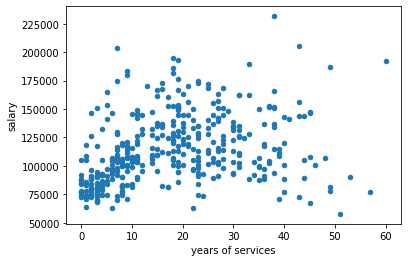

In [41]:
df.plot(kind = 'scatter', x = 'yrs.service', y = 'salary')
plt.xlabel("years of services")
plt.ylabel("salary")

plt.show()

Next, I look into the correlation between variables in the table. The correlation between years of service and salary is 0.335. This indicts a very week correlation. This explains why we did not observe a positive relationship on the graph. 

In [ ]:
df.corr()

In [ ]:
df.corr()>0.9

  By looking at the correlations, I see that there is a strong positive correlation between years of service and years since Phd. 

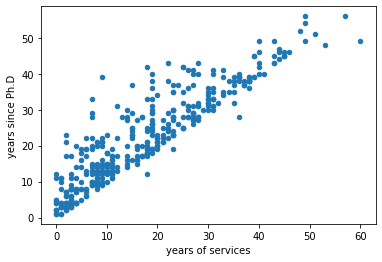

In [42]:
df.plot(kind = 'scatter', x = 'yrs.service', y = 'yrs.since.phd')
plt.xlabel("years of services")
plt.ylabel("years since Ph.D")

plt.show()

How many professors have displine A?

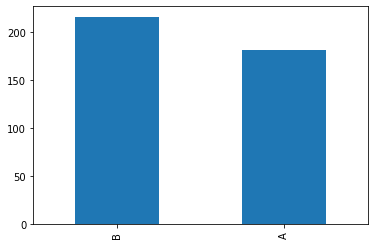

In [ ]:
df["discipline"].value_counts().plot(kind='bar') # There are more B discipline than A
plt.xlabel("disciplie")
plt.ylabel("count")

What is the ratio of male vs female professors?

Text(0, 0.5, 'count')

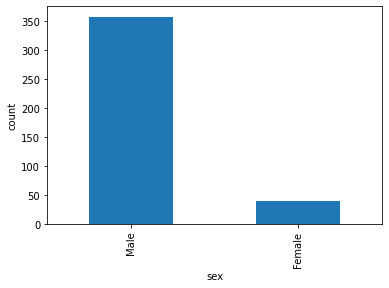

In [44]:
df["sex"].value_counts().plot(kind='bar')
plt.xlabel("sex")
plt.ylabel("count")


Your observations from the visuals: 
there are many more male professors than female

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here:

1.  There is no correlation between salary and year of services. There would be many reasons, such as professors work fewer hours as they get older. The exact reasons are unclear here since we don't have relevant information. 
2. There is a strong positive correlation between years of service and years since Ph.D. In other words, more years of service indicates more years since Ph.D. 
3. There are more B discipline than A
4. There are many more male professors than female



